In [1]:
path=  'C:/Users/felipe/Documents/Brain/'

In [2]:
import sys
sys.path.append(path) 

In [3]:
from sklearn.ensemble import RandomForestRegressor
from base_regressor import BaseRegressor
from skopt.space import Real, Categorical, Integer

class RFRegressor(BaseRegressor):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None,model_params_search=None,fit_params_train=None,model_params_train=None, name_model="MLP"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search ,model_params_search,fit_params_train ,model_params_train, name_model)
        
        self.model_ml= RandomForestRegressor
        self.params = {
            'n_estimators': 100,
            'max_depth': None,
            'min_samples_split': 2,
            'min_samples_leaf': 1,            
            'bootstrap': True
        }
        
        self.params_space = {
            'n_estimators': Integer(100, 1000),
            'max_depth': Integer(3, 100),
            'min_samples_split': Integer(2, 20),
            'min_samples_leaf': Integer(1, 10),
            'max_features': Categorical([ 'sqrt', 'log2']),
            'bootstrap': [True, False] 
        }


c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import pandas as pd
import numpy as np
import pickle

#save_path=f'{path}Random_Forest/'
file_name = '/Brain_Age/dataframe_alpha.xlsx'
file_path = f"{path}{file_name}"

df = pd.read_excel(file_path)
# Filtrar las filas con Age mayor de 20
df_filtrado = df[df['Age'] > 20].reset_index(drop=True)
# Separar la variable de destino (y) y las características (X)
X = df_filtrado.drop(columns=["Unnamed: 0", "Age"])
y = df_filtrado["Age"]

rf_model = RFRegressor()
rf_model.set_data(X,y)

In [ ]:
opt_rf, best_params_rf = rf_model.SearchBestModel(X, y, n_iter_=1000, early_stop=False, save_result=True)
#with open('C:/Users/felip/Documents/memoria_2/Brain_Age_/Random_Forest/Modelos/opt_RF_model_all_features.pickle', 'wb') as file:
    #pickle.dump(opt_rf, file)

In [5]:
with open(f'{path}Opt_Model/opt_RF_model_all_features.pickle', 'rb') as file:
    opt_rf= pickle.load(file)

In [9]:
resultados = opt_rf.cv_results_
rf_model.guardar_resultados_busqueda(resultados=resultados)

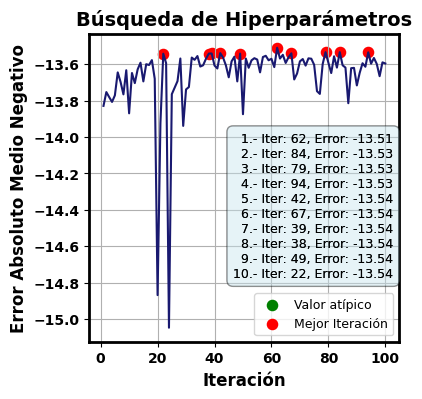

Top 1: Iteración 62, Error -13.509066321156386
Top 2: Iteración 84, Error -13.53321679099264
Top 3: Iteración 79, Error -13.533515914400038
Top 4: Iteración 94, Error -13.53430491447396
Top 5: Iteración 42, Error -13.538485501210065
Top 6: Iteración 67, Error -13.539969260457033
Top 7: Iteración 39, Error -13.540748169905495
Top 8: Iteración 38, Error -13.541280763633356
Top 9: Iteración 49, Error -13.541313727556911
Top 10: Iteración 22, Error -13.541946727251954


In [7]:
rf_model.plot_search_best_model(opt_rf, linewidth=1.5, color='midnightblue', num_max=100)

In [9]:
best_params_rf = rf_model.best_hyper(opt_rf, num_max=100)

In [10]:
best_params_rf

[{'bootstrap': False,
  'max_depth': 29,
  'max_features': 'sqrt',
  'min_samples_leaf': 3,
  'min_samples_split': 2,
  'n_estimators': 1000},
 {'bootstrap': False,
  'max_depth': 88,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 3,
  'n_estimators': 150},
 {'bootstrap': False,
  'max_depth': 49,
  'max_features': 'sqrt',
  'min_samples_leaf': 3,
  'min_samples_split': 2,
  'n_estimators': 969},
 {'bootstrap': False,
  'max_depth': 35,
  'max_features': 'sqrt',
  'min_samples_leaf': 2,
  'min_samples_split': 2,
  'n_estimators': 972},
 {'bootstrap': False,
  'max_depth': 39,
  'max_features': 'sqrt',
  'min_samples_leaf': 3,
  'min_samples_split': 2,
  'n_estimators': 1000},
 {'bootstrap': False,
  'max_depth': 30,
  'max_features': 'sqrt',
  'min_samples_leaf': 3,
  'min_samples_split': 2,
  'n_estimators': 1000},
 {'bootstrap': False,
  'max_depth': 38,
  'max_features': 'sqrt',
  'min_samples_leaf': 3,
  'min_samples_split': 2,
  'n_estimators': 1000},
 {

# Trainer

In [11]:
results, best_model_results, best_model = rf_model.trainer(params_=best_params_rf[0])

In [30]:
#with open(f'{path}Opt_Model/BestModel_RF_all_features.pickle', 'wb') as file:
#    pickle.dump(rf_model.model, file)
#with open(f'{path}Opt_Model/results_RF_model_all_features.pickle', 'wb') as file:
#    pickle.dump(results, file)

In [5]:
with open(f'{path}Opt_Model/BestModel_RF_all_features.pickle', 'rb') as file:
    model =  pickle.load(file)
    
with open(f'{path}Opt_Model/results_RF_model_all_features.pickle', 'rb') as file:
    results =  pickle.load(file)

In [6]:
y_pred = rf_model.predicter(rf_model.X_test)

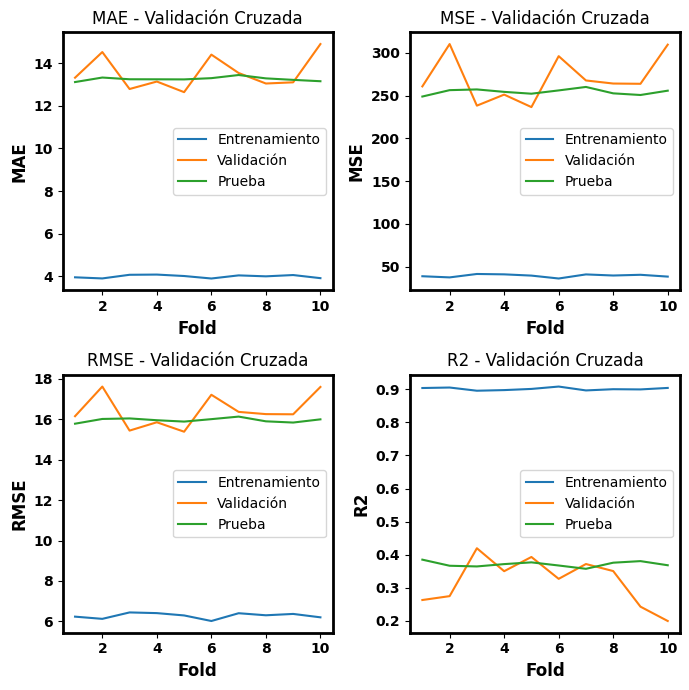

In [12]:
rf_model.plot_metricas_evaluacion(results)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     176.7
Date:                Wed, 14 Aug 2024   Prob (F-statistic):           1.88e-31
Time:                        20:42:46   Log-Likelihood:                -986.96
No. Observations:                 276   AIC:                             1978.
Df Residuals:                     274   BIC:                             1985.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.9857      1.336     24.699      0.0

C:\Users/felipe/Documents/Brain\base_regressor.py:358: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


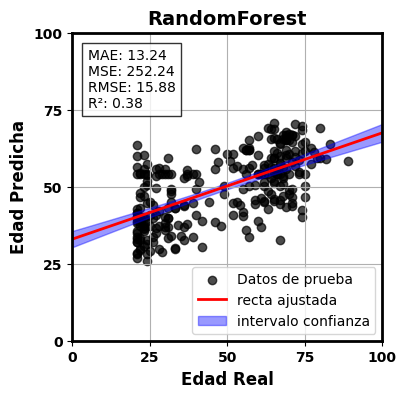

Error medio absoluto: 13.238425386681309
Error cuadrático medio: 252.23599342940778
Raíz del error cuadrático medio: 15.88193922131072
Coeficiente de determinación (R²): 0.3767446349822432


In [14]:
rf_model.plot_regresion(y=y_pred,x= rf_model.y_test,label_='Datos de prueba' ,x_size=4,x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100, title='RandomForest',line_ideal=False,confidence_interval=True,  color= 'black',alpha=0.7,xlabel='Edad Real',ylabel='Edad Predicha',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red')

In [15]:
y_pred_train=rf_model.predicter(rf_model.X_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     7190.
Date:                Wed, 14 Aug 2024   Prob (F-statistic):               0.00
Time:                        20:42:53   Log-Likelihood:                -3512.1
No. Observations:                1101   AIC:                             7028.
Df Residuals:                    1099   BIC:                             7038.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3848      0.475     26.093      0.0

C:\Users/felipe/Documents/Brain\base_regressor.py:358: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


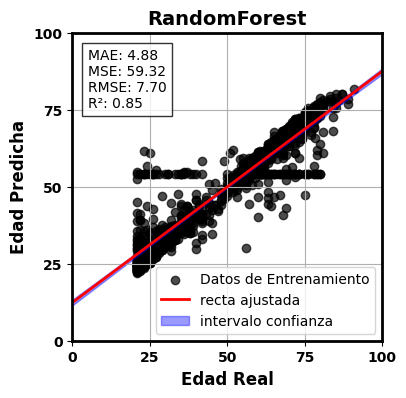

Error medio absoluto: 4.877464396320025
Error cuadrático medio: 59.32470120115164
Raíz del error cuadrático medio: 7.7022529951405545
Coeficiente de determinación (R²): 0.8518433283117082


In [16]:
rf_model.plot_regresion(y=y_pred_train,x= rf_model.y_train,label_='Datos de Entrenamiento' ,x_size=4,x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100, title='RandomForest',line_ideal=False,confidence_interval=True,  color= 'black',alpha=0.7,xlabel='Edad Real',ylabel='Edad Predicha',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red')

In [17]:
residuals = rf_model.predicter(rf_model.X_train)-rf_model.y_train.to_numpy() 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     788.9
Date:                Wed, 14 Aug 2024   Prob (F-statistic):          2.77e-131
Time:                        20:43:05   Log-Likelihood:                -3512.1
No. Observations:                1101   AIC:                             7028.
Df Residuals:                    1099   BIC:                             7038.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3848      0.475     26.093      0.0

C:\Users/felipe/Documents/Brain\base_regressor.py:358: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


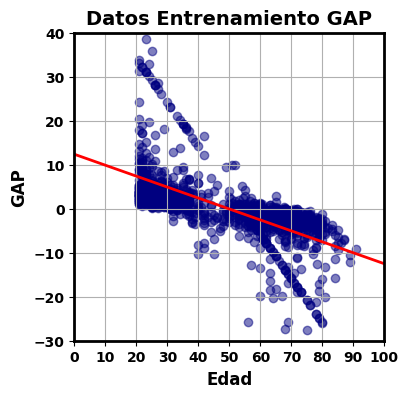

Error medio absoluto: 49.93297695734458
Error cuadrático medio: 3127.5733202890806
Raíz del error cuadrático medio: 55.92471117752045
Coeficiente de determinación (R²): -6.8107574789796805


In [18]:
rf_model.plot_regresion(x=rf_model.y_train,y=residuals,line_ideal=False,confidence_interval=False,x_min_limit=0,x_max_limit=100,legend=False,legend_metrics=False, title='Datos Entrenamiento GAP', xlabel='Edad', ylabel='GAP')

In [19]:
y_pred_corrected=rf_model.predicter_corrected()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     523.3
Date:                Wed, 14 Aug 2024   Prob (F-statistic):           1.66e-65
Time:                        20:43:09   Log-Likelihood:                -986.96
No. Observations:                 276   AIC:                             1978.
Df Residuals:                     274   BIC:                             1985.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.6009      1.336     15.425      0.0

C:\Users/felipe/Documents/Brain\base_regressor.py:358: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


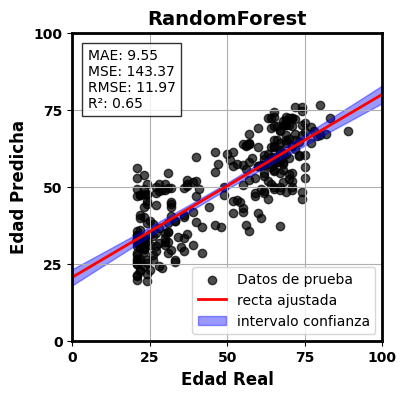

Error medio absoluto: 9.546279425159689
Error cuadrático medio: 143.36830171865074
Raíz del error cuadrático medio: 11.973650308851129
Coeficiente de determinación (R²): 0.6457481662122857


In [20]:
rf_model.plot_regresion(y=y_pred_corrected,x= rf_model.y_test,label_='Datos de prueba' ,x_size=4,x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100, title='RandomForest',line_ideal=False,confidence_interval=True,  color= 'black',alpha=0.7,xlabel='Edad Real',ylabel='Edad Predicha',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red')

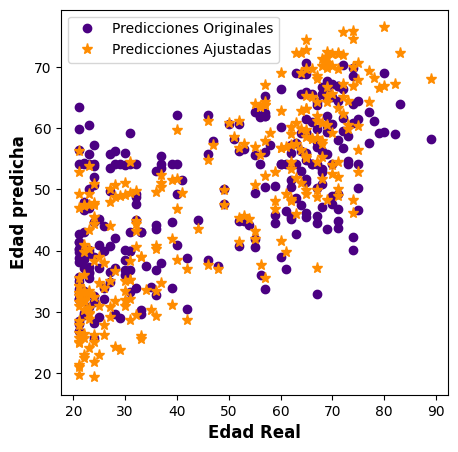

In [21]:
import matplotlib.pyplot as plt

# Gráfico de comparación antes y después de la corrección
plt.figure(figsize=(5, 5))
plt.plot(rf_model.y_test, y_pred, 'o', label='Predicciones Originales',color='indigo')
plt.plot(rf_model.y_test, y_pred_corrected, '*', label='Predicciones Ajustadas', color='darkorange', markersize=8)
#plt.plot([min(xgb_model.y_test), max(xgb_model.y_test)], [min(xgb_model.y_test), max(xgb_model.y_test)], '--', color='black', label='Línea Ideal')
plt.xlabel('Edad Real', fontweight='bold', fontsize=12)
plt.ylabel('Edad predicha', fontweight='bold', fontsize=12)
plt.legend()
#plt.title(f'MAE antes: {mae_before:.4f}, MAE después: {mae_after:.4f}')
plt.show()

In [22]:
shap_values, shap_sumary_sorted = rf_model.feature_importance_shap(X_test = rf_model.X_test, model = rf_model.model)

Importancia de características basada en suma de valores SHAP:
Low_subj_spec_EPP_OCC_right: 407.4199867757552
IAF_OCC_left: 392.9804916275552
IAF_OCC_right: 322.2728599475618
High_subj_spec_RPD_CING_right: 228.5172265545545
Low_subj_spec_EPP_PARIET_left: 219.68994567368142
Low_subj_spec_EPP_PARIET_right: 215.05621283267848
High_subj_spec_EPP_CING_right: 212.10904612936463
Low_subj_spec_RPD_CING_right: 156.65660413258922
Alpha2_canon_RPD_PARIET_left: 140.15392373739874
Low_subj_spec_RPD_HPC_left: 133.18647037360353
Alpha2_canon_EPP_PARIET_left: 131.62106482181795
Alpha2_canon_RPD_HPC_left: 121.40988701732067
Alpha2_canon_RPD_CING_right: 118.5144612727591
Low_subj_spec_RPD_OCC_left: 117.0610301548076
Alpha2_canon_EPP_HPC_left: 115.94356968390707
Low_subj_spec_EPP_OCC_left: 115.8871453409216
High_subj_spec_EPP_HPC_left: 100.03633165507748
High_subj_spec_RPD_HPC_left: 99.82738160804021
Low_subj_spec_RPD_HPC_right: 89.3217809182247
Alpha2_canon_EPP_PARIET_right: 85.17705040919154
High_subj_

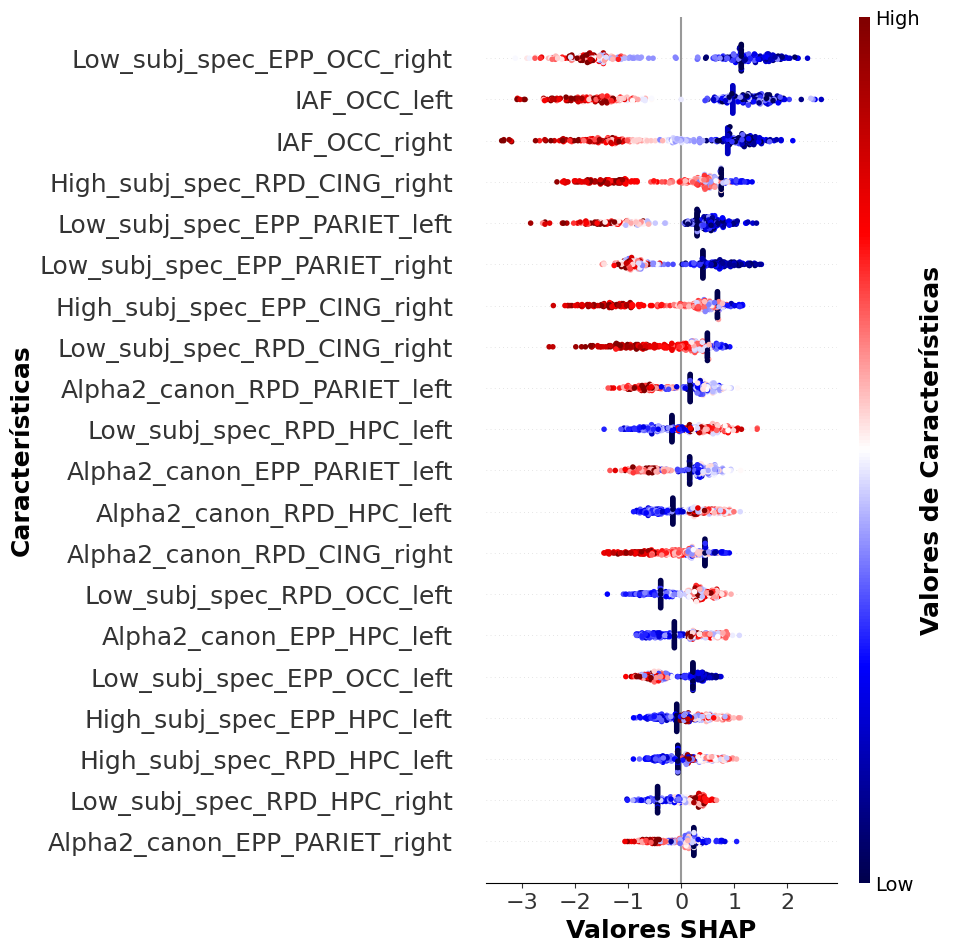

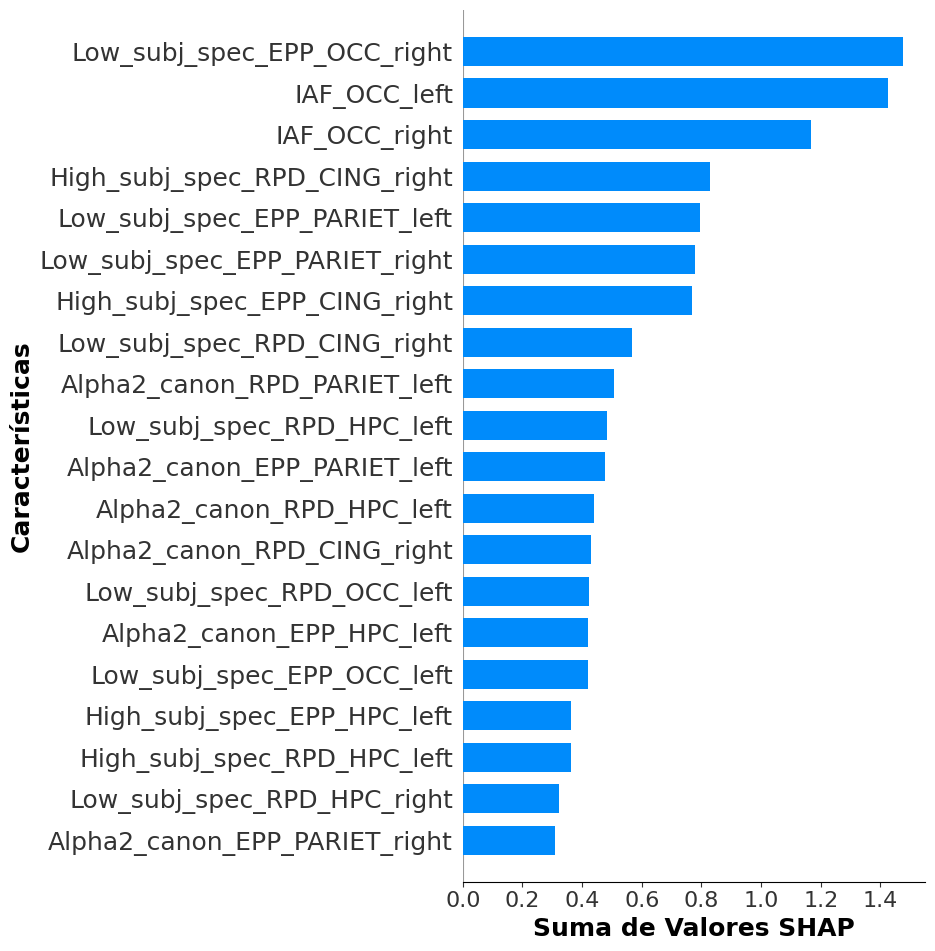

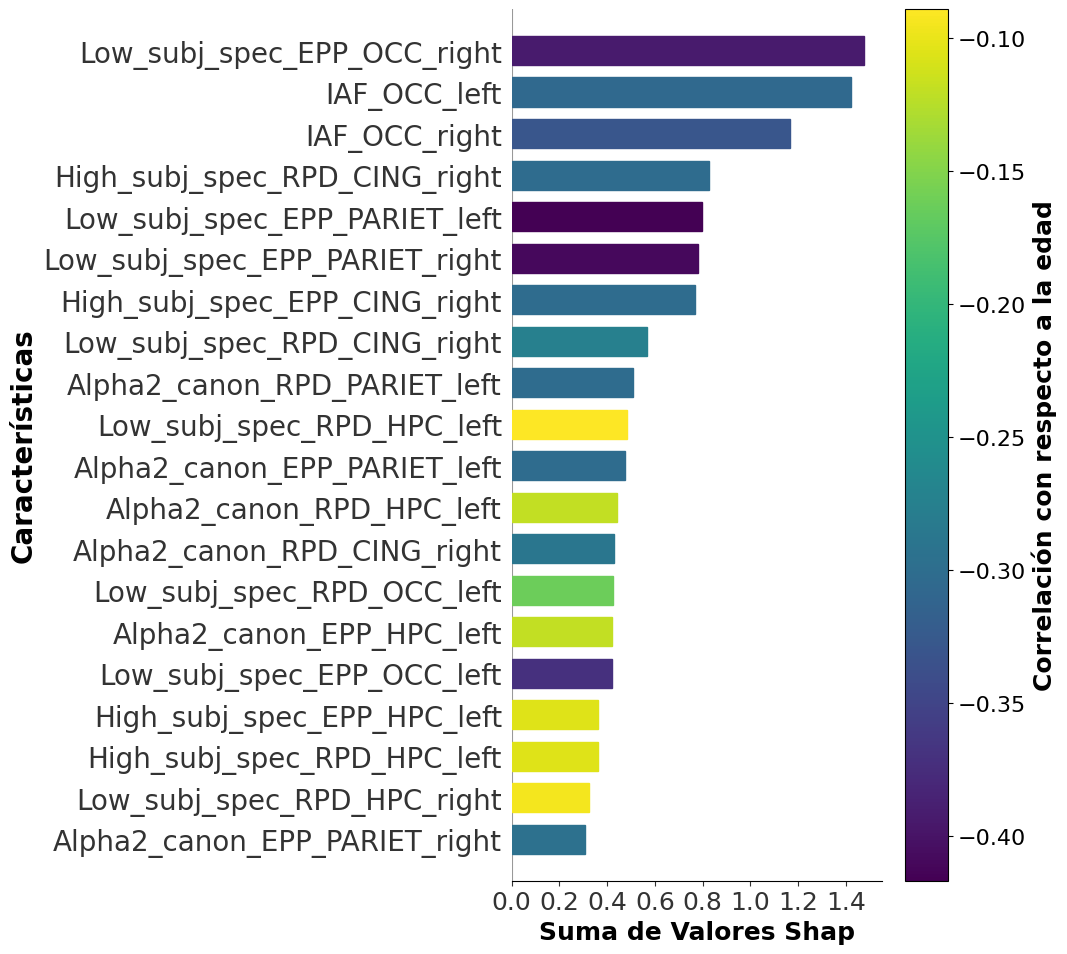

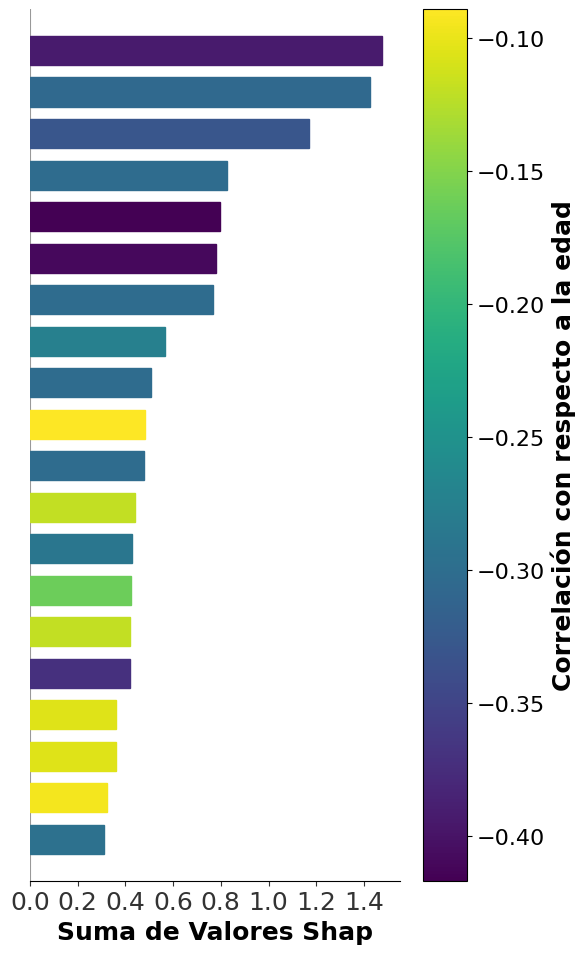

In [23]:
rf_model.plot_feature_importance(shap_values=shap_values,X_test=rf_model.X_test,y_test=rf_model.y_test)

In [24]:
with open(f'{path}Opt_Model/shap_values_rf.pickle', 'wb') as file:
        pickle.dump(shap_values, file)
with open(f'{path}Opt_Model/shap_summary_sorted_rf.pickle', 'wb') as file:
        pickle.dump(shap_sumary_sorted, file)

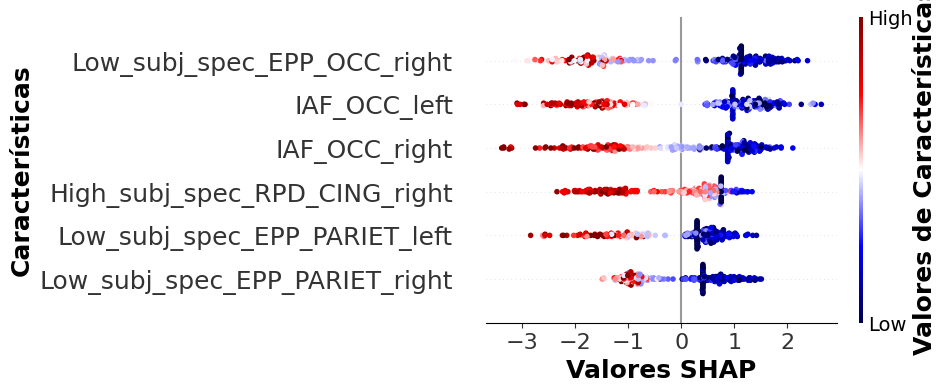

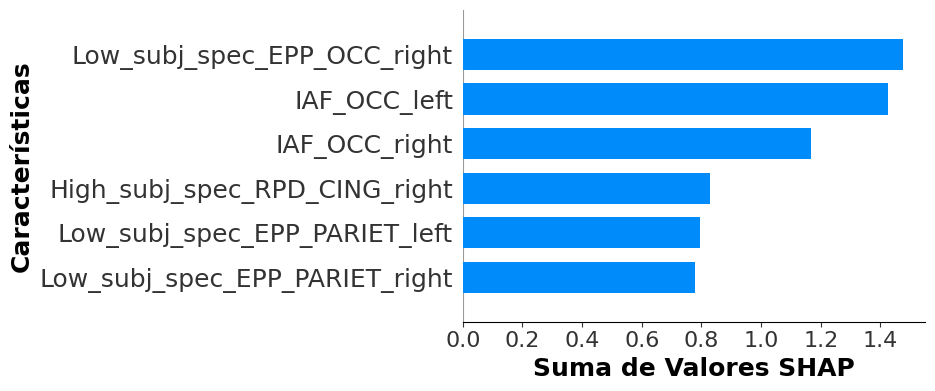

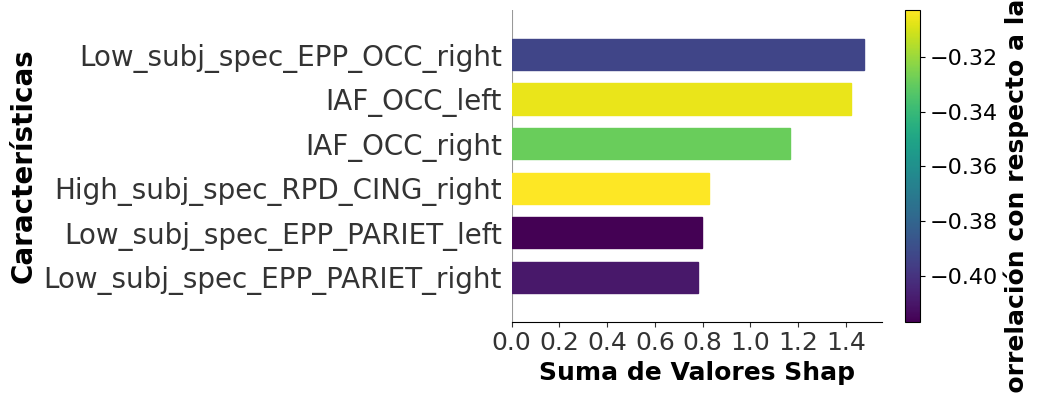

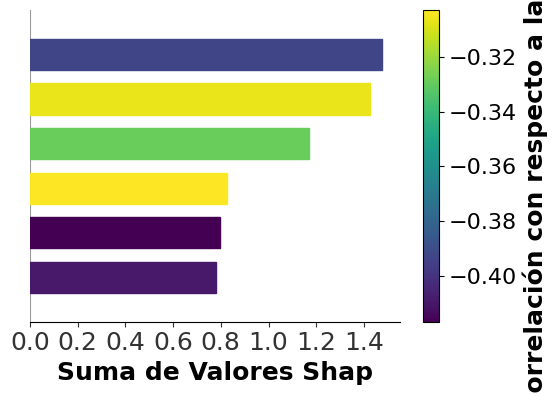

In [25]:
rf_model.plot_feature_importance(shap_values=shap_values,X_test=rf_model.X_test,y_test=rf_model.y_test, max_features=6)

# Importancia por region

In [3]:
with open('C:/Users/felipe/Documents/Opt_Model/shap_summary_sorte_rf.pickle', 'rb') as file:
    shap_summary_sorted_rf = pickle.load(file)


In [27]:
shap_por_region_sorted, resultado_normalizado_sorted=rf_model.shap_region(shap_summary_sorted=shap_sumary_sorted, num_max=20)

OCC_right: 1.000000
CING_right: 0.980957
OCC_left: 0.857797
HPC_left: 0.781704
PARIET_left: 0.673523
PARIET_right: 0.411452
HPC_right: 0.122410


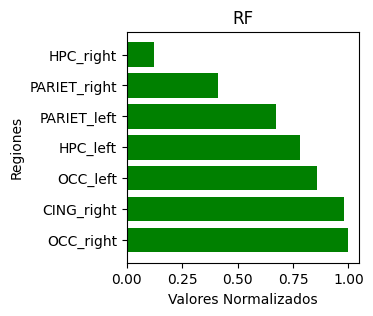

In [28]:
rf_model.plot_normalized_values(resultado_normalizado_sorted, color='green', name_set='RF',x_size=3,y_size=3)

c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


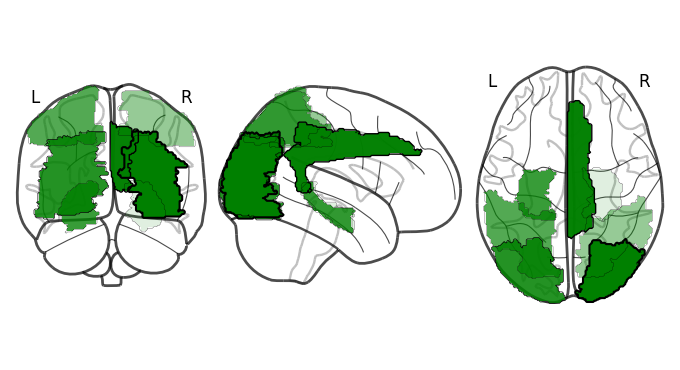

In [29]:
base_path = f'{path}cerebritos/'

rf_model.plot_brain_regions(resultado_normalizado_sorted, base_path, color='green')